In [35]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from __future__ import print_function

In [36]:
def add_layer(inputs, in_size, out_size, activation_function=None):
    with tf.name_scope("layers"):
        with tf.name_scope("weight"):
            weight = tf.Variable(tf.random_normal([in_size, out_size]))
        with tf.name_scope("biases"):
            biases = tf.Variable(tf.zeros([1,out_size])+0.1)
        with tf.name_scope("input"):
            Wx_plus_b = tf.matmul(inputs, weight) + biases;
        if activation_function == None:
            output = Wx_plus_b
        else:
            output = activation_function(Wx_plus_b)
        return(output)
    

In [37]:
# Create some data

x_data = np.linspace(-1,1,300)[:,np.newaxis]
noise = np.random.normal(0,0.05, x_data.shape).astype(np.float32)
y_data = np.square(x_data) -0.5 + noise

# plt.scatter(x_data, y_data)
# plt.show()

In [38]:
#define placeholder to input to network
with tf.name_scope("inputs"):
    xs = tf.placeholder(tf.float32,[None,1], name='x_inputs')     # None for no of sample as not defined and 1 for  
                                     #number of feature in x_data as there is only 1 (300) during creation
    ys = tf.placeholder(tf.float32,[None,1], name='y_inputs')


In [39]:
#add hidden layer
layer1 = add_layer(xs, 1, 10, activation_function=tf.nn.relu)
prediction = add_layer(layer1, 10, 1, activation_function=None)

#error
with tf.name_scope("loss"):
    loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys-prediction), reduction_indices=[1]))
with tf.name_scope("train_step"):
    train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)


In [54]:
session = tf.Session()
session.run(tf.global_variables_initializer())


In [55]:
writer = tf.summary.FileWriter("logs/", graph=session.graph) # tensor board summary run
                                                            # tensorboard --logdir="<path_directory>"

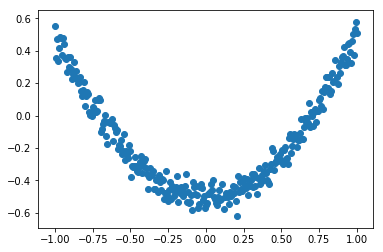

In [49]:
#plot real data

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(x_data, y_data)
plt.ion()
plt.show()
 # to non block the plotting process

In [50]:
for i in range(1000):
    session.run(train_step, feed_dict={xs:x_data, ys:y_data})
    if i%50==0:
        print(session.run(loss, feed_dict={xs:x_data, ys:y_data}))

# for i in range(100):
#     session.run(train_step, feed_dict={xs:x_data, ys:y_data})
#     if i%50==0:
#         try:                            #to remove lines in graph on each iteration
#             ax.lines.remove(lines[0])
#         except Exception:
#             pass
        
#         prediction_value = session.run(prediction, feed_dict={xs:x_data})
        
#         lines = ax.plot(x_data, prediction_value, 'r-', linewidth=5)
#         plt.pause(0.1)

0.09513437
0.008216713
0.0067233173
0.005734448
0.0050876536
0.004657764
0.0043527586
0.004146676
0.004002437
0.0038670646
0.0037573949
0.0036518236
0.0035687871
0.0035140642
0.0034677943
0.00342225
0.0033795435
0.0033386822
0.0032978717
0.0032579906
